In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Python | Ciencia de Datos - Machine Learning/TF/datos_falsos.csv") # Cargamos el marco de datos

In [3]:
df.head() # Exploramos el marco de datos

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.info() # Obtenemos informacion del marco de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


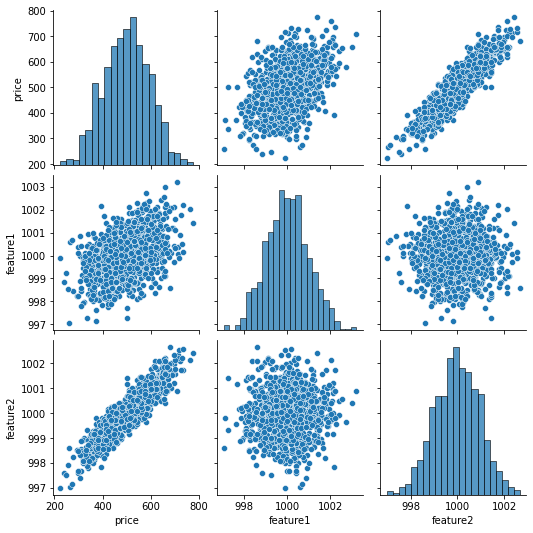

In [5]:
sns.pairplot(df)# Visualizamos el marco de datos para ver la corelacion

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['feature1','feature2']].values # Creamos la martiz, de numpy para TensorFlow, extrae los datos y lso convierte en matriz

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [9]:
y = df[['price']].values # realizamos lo mismo con y

In [10]:
y

array([[461.52792939],
       [548.13001146],
       [410.29716167],
       [540.38221981],
       [546.02455292],
       [542.9836716 ],
       [555.48566416],
       [417.56972453],
       [373.14653122],
       [633.35029248],
       [624.24709206],
       [475.37241721],
       [600.36844486],
       [532.83295175],
       [472.8353628 ],
       [506.31229096],
       [508.414406  ],
       [610.4553519 ],
       [323.65776198],
       [446.21230389],
       [362.12270299],
       [433.41064026],
       [562.00257647],
       [637.30962074],
       [522.80800754],
       [469.8028243 ],
       [543.10992778],
       [565.43416994],
       [530.03285381],
       [610.58016503],
       [482.55641188],
       [327.56004052],
       [579.73083872],
       [448.42981468],
       [628.97709187],
       [536.79737216],
       [570.06729543],
       [357.82557519],
       [612.08492732],
       [444.67970846],
       [600.1186364 ],
       [523.53312776],
       [512.94994495],
       [614

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # hacemos el train y test split

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

In [14]:
# vamos a escalar las variables, se utilizara MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
# transformamos los datos
X_train = scaler.transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
# validamos la tansformacion
X_train.min() # el valor minimo

0.0

In [20]:
X_train.max() # el valor maximo

1.0

In [21]:
# importamos los paquetes 
from tensorflow.keras.models import Sequential


In [22]:
from tensorflow.keras.layers import Dense

# Dos formas de crear una red neuronal

In [25]:
# Forma 1
model = Sequential([Dense(4,activation= 'relu'),
                    Dense(2,activation= 'relu'),
                    Dense(1)])

In [26]:
# Froma 2
model = Sequential()
model.add(Dense(4,activation= 'relu'))
model.add(Dense(2,activation= 'relu'))
model.add(Dense(1))

In [23]:
model = Sequential()
model.add(Dense(4,activation= 'relu'))
model.add(Dense(4,activation= 'relu'))
model.add(Dense(4,activation= 'relu'))
model.add(Dense(1))
model.compile(optimizer= 'rmsprop', loss= 'mse')

In [28]:
# multi-class
# optimizer = 'rmsprop'
# loss = 'categorial_crossentropy'
# metrics = ['accuracy']

# binario
# optimizer = 'rmsprop'
# loss = 'binary_crossentropy'
# metrics = ['accuracy']

# error cuadratico medio - regresion
# optimizer = 'rmsprop'
# loss = 'mse'


In [24]:
model.fit(x = X_train, y = y_train, epochs= 250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 259692.1080
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 255870.0489
Epoch 3/250
22/22 [==============================] - 0s 949us/step - loss: 257772.5917
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 259251.3077
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 249933.7167
Epoch 6/250
22/22 [==============================] - 0s 961us/step - loss: 255363.3689
Epoch 7/250
22/22 [==============================] - 0s 942us/step - loss: 251802.1773
Epoch 8/250
22/22 [==============================] - 0s 949us/step - loss: 256406.9613
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254327.3247
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255312.3152
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 254772.0048
Epoch 12/250
22/22 [==============================] - 0

In [25]:
# vamos a sacar la historia de loss

loss_df = pd.DataFrame(model.history.history)

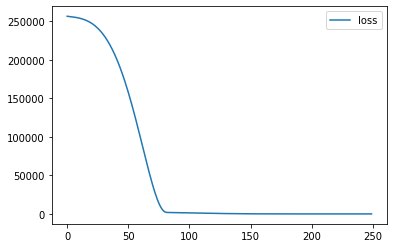

In [26]:
loss_df.plot()

# Evaluacion

In [27]:
model.evaluate(X_test,y_test, verbose=0)

25.1043758392334

In [28]:
model.evaluate(X_train,y_train, verbose=0)

23.72999382019043

In [35]:
#Hacemos una comparacion dle modelo, para ver las preddiciones con el valor real

test_pred = model.predict(X_test)

In [36]:
test_pred = pd.Series(test_pred.reshape(300,))

In [37]:
pred_df = pd.DataFrame(y_test, columns= ['Test True y'] )

In [39]:
# concatenamos
pred_df = pd.concat([pred_df,test_pred], axis= 1)

In [40]:
# Cambiamos nombre de columnas
pred_df.columns = ['Test True y', 'Predictions']

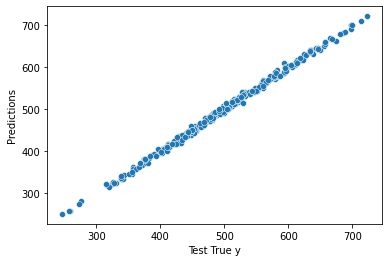

In [42]:
sns.scatterplot(x='Test True y', y= 'Predictions', data= pred_df)

# sacamos las metricas

In [43]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error

In [44]:
mean_absolute_error(pred_df['Test True y'], pred_df['Predictions'])

4.017498631606499

In [45]:
mean_squared_error(pred_df['Test True y'], pred_df['Predictions'])**0.5

5.0104270451662325

In [47]:
# Probamos con un valor nuevo
valor_nuevo = [[999,1000]]

In [48]:
valor_nuevo = scaler.transform(valor_nuevo)

In [49]:
model.predict(valor_nuevo)

array([[459.9116]], dtype=float32)

In [51]:
# Salvamos el modelo
from tensorflow.keras.models import load_model

In [53]:
model.save('/content/drive/MyDrive/Python | Ciencia de Datos - Machine Learning/modelo_datos_falsos.h5')

In [54]:
# Importar el modelo
modelo_nuevo = load_model('/content/drive/MyDrive/Python | Ciencia de Datos - Machine Learning/modelo_datos_falsos.h5')

In [55]:
modelo_nuevo.predict(valor_nuevo)

array([[459.9116]], dtype=float32)